In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle


In [4]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
! kaggle datasets download -d mirichoi0218/insurance

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
! kaggle datasets download <insurance.zip>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: ` kaggle datasets download <insurance.zip>'


In [11]:
! unzip archive.zip

Archive:  archive.zip
  inflating: insurance.csv           


In [13]:
import pandas as pds
  
# reading the XLSX file
file =('insurance.csv')
df = pds.read_csv(file)
  
# displaying the contents of the XLSX file
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**FONKSİYONLARIM**

In [17]:
def dummies(df,col):
    dummy = pd.get_dummies(df, columns = [col])
    return dummy

    """****************************************************************************************************************************************
@brief               : Hata tahminlerinin hesaplanmasını sağlayan fonksiyondur.
@input   testy       : Olması gereken sonuç değerleri.
@input   yhat        : Tahmin edilen sonuç değerleri.
@output  mae_model   : Ortalama Mutlak Hata
@output  mse_model   : Ortalama Kare Hata 
@output  rmse_model  : Kök Ortalama Kare Hata 
"""


def errors(testy,yhat):
    mae_model = mean_absolute_error(testy,yhat)
    mse_model = mean_squared_error(testy,yhat)
    rmse_model = np.sqrt(mse_model)
    
    return print("mae:", mae_model  ,"\nmse:", mse_model, "\nrmse:",rmse_model)
    

"""****************************************************************************************************************************************
@brief              : r2 değerini hesaplayan fonksiyondur.
@input   testyvalue : Olması gereken y değerleri.
@input   yhat       : Tahmin edilen olan y değerleri.
@output  r2_value   : r2 oranı.
"""

def r2(testyvalues, yhat):
    r2_value = r2_score(testyvalues,yhat)
    return r2_value

**EKSİK VERİLERİN İNCELENMESİ** 

In [18]:
# Veri setinde eksik bir veri var mı bunun incelemesi yapılıyor.
missing_values = df.isna().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


**BMİ - VÜCUT KÜTLE ENDEKSİNİN İNCELENMESİ**

In [19]:
#bmi değerleri sayılıyor.
df.bmi.value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

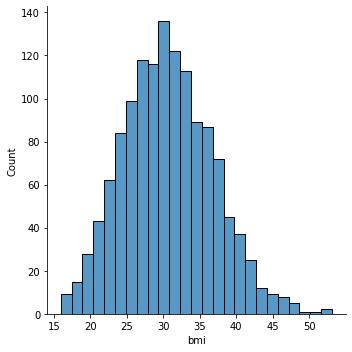

In [20]:
# Histogram grafiğinde bmi değerlerinin dağılımı gösteriliyor.
sns.displot(df["bmi"], kde = False )

**“smoker” ile “charges” arasındaki ilişki**




/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


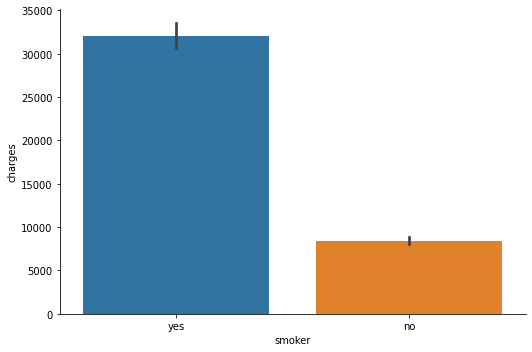

In [21]:
sns.factorplot(x="smoker",y="charges",data=df,kind="bar",size=5,aspect=1.5)

*Sigara kullanan insanların, sigara kullanmayanlara göre daha fazla tıbbi masraf harcadığı açıkca görülebiliyor.*

 **“smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişki**

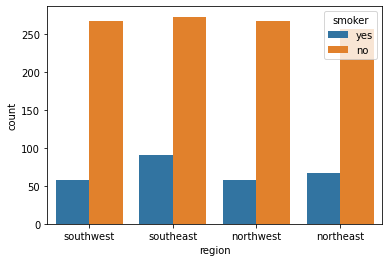

In [22]:
sns.countplot(x="region",data=df, hue="smoker")

*Bölgeler arasında sigara kullanan ve kullanmayan insan sayısını görebiliriz. En yüksek sigara kullanım oranı güneydoğu bölgesidir.*

**bmi” ile “sex”(Cinsiyet) arasındaki ilişki**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


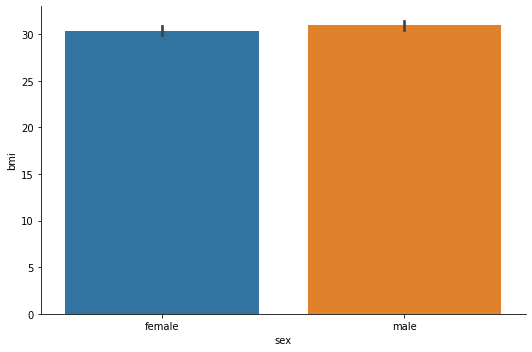

In [23]:
sns.factorplot(y="bmi",x="sex",data=df,kind="bar",size=5,aspect=1.5)

*Vucüt kitle indexi ve cinsiyet arasındaki ilişkiyi inceliyoruz.*

**En çok “children”’a sahip “region”’ı bulunuz**

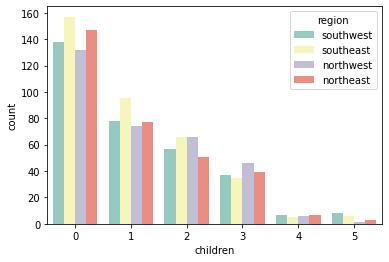

In [24]:
sns.countplot(x="children",data=df, hue="region", palette="Set3")

In [25]:
df.groupby("region").sum()

,age,bmi,children,charges
region,,,,
northeast,12723,9452.215,339,4.343669e+06
northwest,12739,9489.930,373,4.035712e+06
southeast,14174,12141.580,382,5.363690e+06
southwest,12823,9943.900,371,4.012755e+06


*Burada en fazla çocuğa sahip bölge güneydoğudur. *

**“Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.**

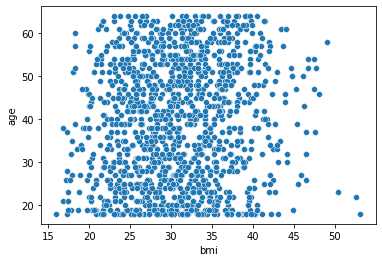

In [26]:
sns.scatterplot(x="bmi",y="age",data=df)

**bmi” ile “children” arasındaki ilişkiyi inceleyiniz.**

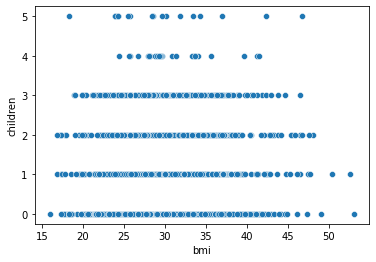

In [27]:
sns.scatterplot(x="bmi",y="children",data=df)

**bmi değişkeninde outlier bulunuyor mu? inceleyiniz**

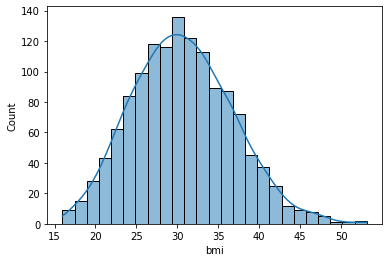

In [28]:
sns.histplot(data=df, x="bmi", kde=True)


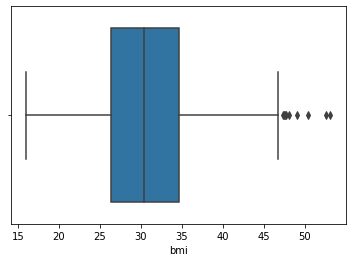

In [29]:
sns.boxplot(data=df, x="bmi")
# burada bulunan ekstra noktalar aslında outlierlarımızı gösteriyor.

In [30]:
## Finding the Boundary Values
# z-score yöntemiyle outliersları ayrıştırıyoruz.

print("Highest allowed",df['bmi'].mean() + 3*df['bmi'].std())
print("Lowest allowed",df['bmi'].mean() - 3*df['bmi'].std())


Highest allowed 48.95795759602359
Lowest allowed 12.368836125949507


In [31]:
## Finding the Outliers

outliers = df[(df['bmi'] > 48.95) | (df['bmi'] < 12.36)]
outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [32]:
## Trimming of Outliers

new_df = df[(df['bmi'] < 48.95) & (df['bmi'] > 12.36)]
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


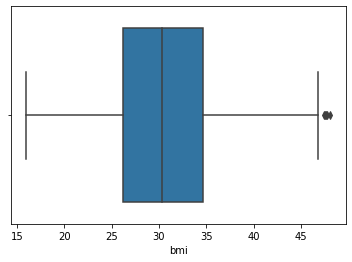

In [33]:
sns.boxplot(data=new_df, x="bmi")
# outlierlardan temizlenmiş yeni bmi'ımız.

**“bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.**

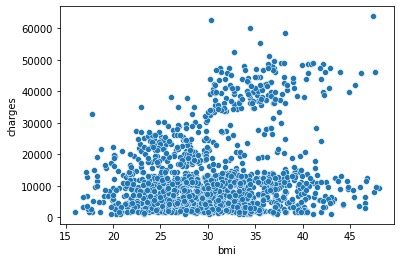

In [34]:
sns.scatterplot(x="bmi",y="charges",data=new_df)

**region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.**

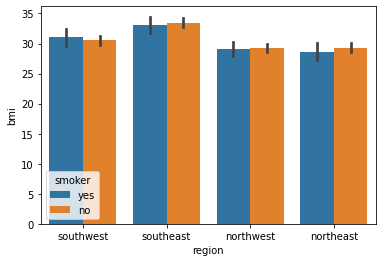

In [35]:
sns.barplot(y="bmi",x="region",data=df, hue="smoker")

[]

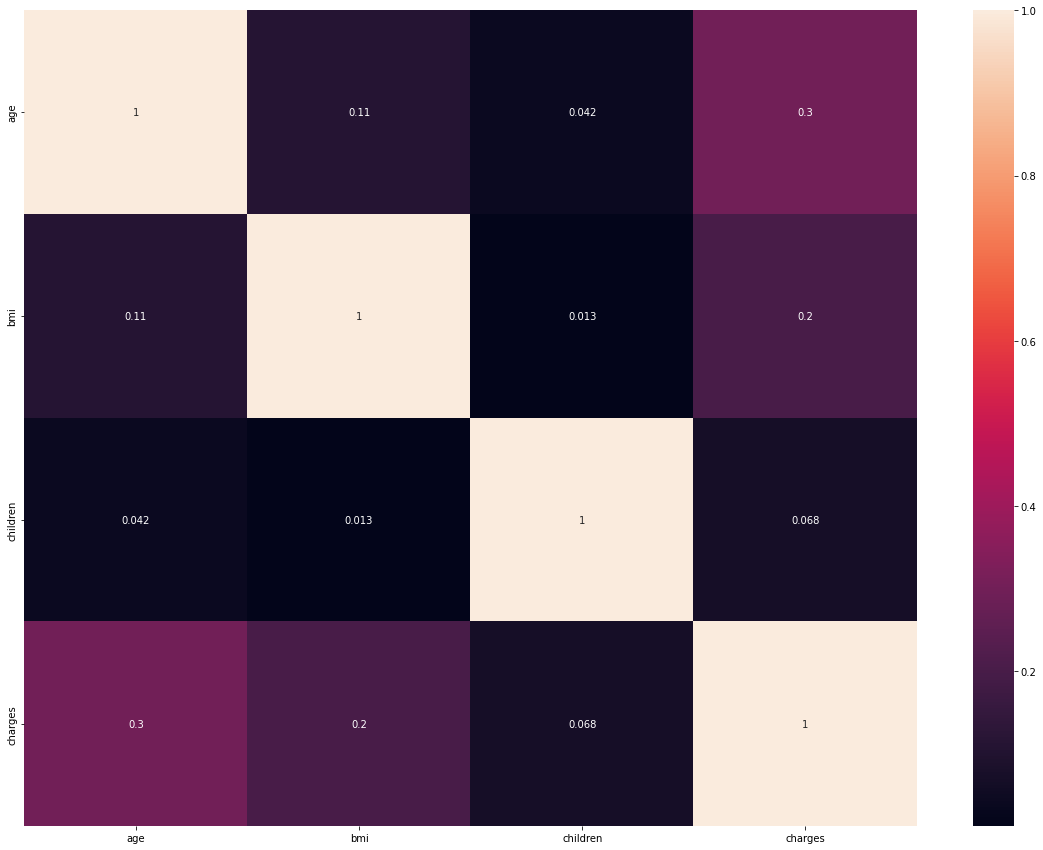

In [36]:
corr = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.plot()

*Her bir bölgedeki bmi değerini, sigara içenler ve içmeyenler olarak görebiliriz.*


**VERİ ÖN İŞLEME YAPILMASI**

In [37]:
new_df.describe()

,age,bmi,children,charges
count,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.233883,30.601555,1.096702,13265.622751
std,14.034654,6.000927,1.206548,12089.666548
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.237500,0.000000,4746.521225
50%,39.000000,30.332500,1.000000,9382.033000
75%,51.000000,34.595000,2.000000,16639.912515
max,64.000000,48.070000,5.000000,63770.428010


In [38]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1334 non-null   int64  
 1   sex       1334 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1334 non-null   int64  
 4   smoker    1334 non-null   object 
 5   region    1334 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


In [39]:
# Yeni datasetimizde bulunan object değerleri için one-hot encoding uyguluyoruz.
df1 = dummies(new_df,"sex")
df2 = dummies(df1,"smoker")
df3 = dummies(df2,"region")
df3

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


**Yeni Korelasyon Haritası**

[]

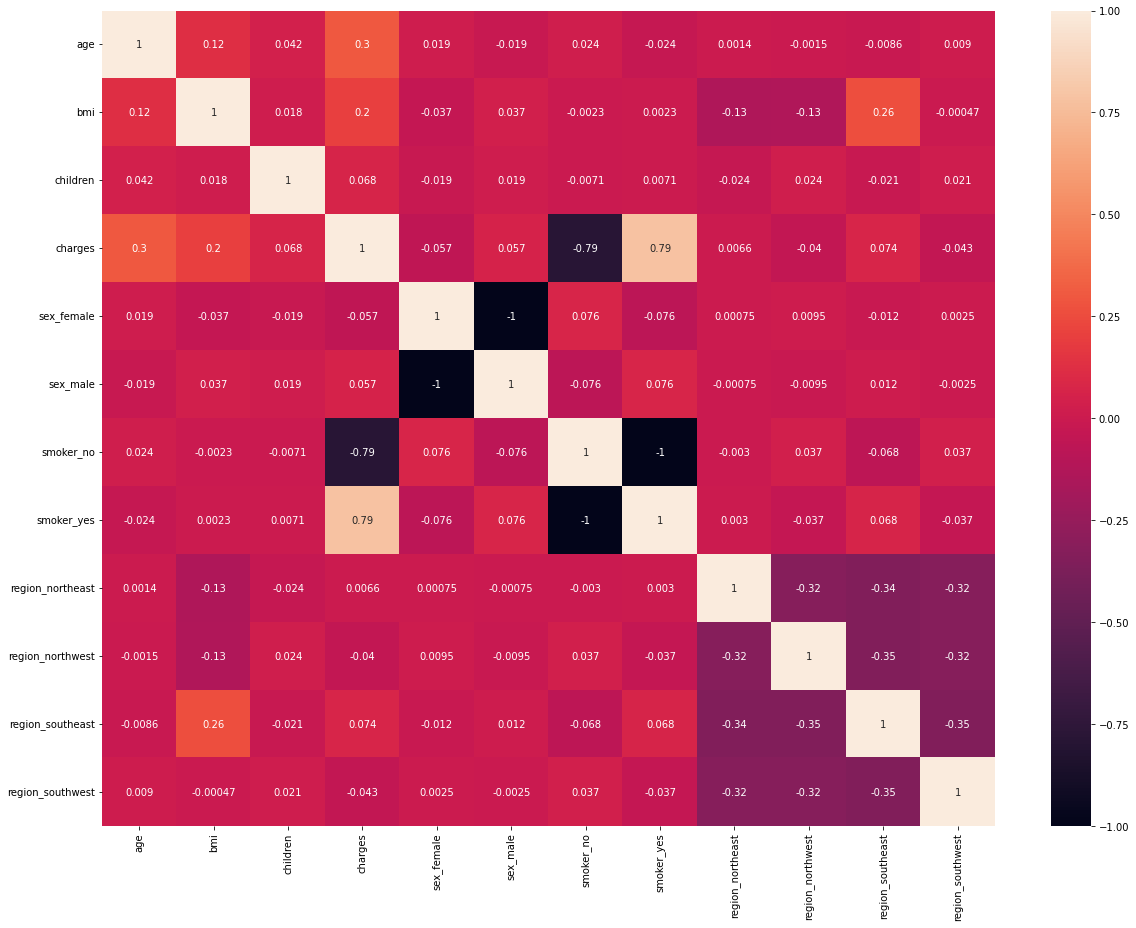

In [40]:
corr = df3.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)
plt.plot()

**Test ve Train Datasetlerini Ayırıyoruz.**

In [41]:
y = df3.charges
x = df3.drop(columns='charges', axis=1)

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [43]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
659,57,28.785,4,1,0,1,0,1,0,0,0
401,47,47.520,1,0,1,1,0,0,0,1,0
1001,24,32.700,0,0,1,0,1,0,0,0,1
1270,26,33.915,1,0,1,1,0,0,1,0,0
202,60,24.035,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
467,56,33.820,2,1,0,1,0,0,1,0,0
300,36,27.550,3,0,1,1,0,1,0,0,0
494,21,25.700,4,0,1,0,1,0,0,0,1
528,46,39.425,1,0,1,1,0,1,0,0,0


In [44]:
y_train

659     14394.39815
401      8083.91980
1001    34472.84100
1270     3292.52985
202     13012.20865
           ...     
467     12643.37780
300      6746.74250
494     17942.10600
528      8342.90875
1195    18838.70366
Name: charges, Length: 1067, dtype: float64

In [45]:
x_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
17,23,23.845,0,0,1,1,0,1,0,0,0
1091,55,29.830,0,1,0,1,0,1,0,0,0
975,29,22.895,0,0,1,0,1,1,0,0,0
838,35,23.465,2,1,0,1,0,1,0,0,0
271,50,34.200,2,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
233,59,27.500,1,0,1,1,0,0,0,0,1
660,37,46.530,3,0,1,1,0,0,0,1,0
461,42,30.000,0,0,1,0,1,0,0,0,1
472,19,29.800,0,1,0,1,0,0,0,0,1


In [46]:
y_test

17       2395.17155
1091    11286.53870
975     16138.76205
838      6402.29135
271     42856.83800
           ...     
233     12333.82800
660      6435.62370
461     22144.03200
472      1744.46500
1139    36898.73308
Name: charges, Length: 267, dtype: float64

In [47]:
print(x.shape, x_train.shape, x_test.shape)

(1334, 11) (1067, 11) (267, 11)


**Normalizayson İşlemi**

In [48]:
#normalizasyon ve standardizasyon
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [49]:
## X_train normalizasyon işlemi

scale_x_train = preprocessing.MinMaxScaler()
X_train_norm = scale_x_train.fit_transform(x_train)
print(X_train_norm)

[[0.84782609 0.4035557  0.8        ... 0.         0.         0.        ]
 [0.63043478 0.99307741 0.2        ... 0.         1.         0.        ]
 [0.13043478 0.52674638 0.         ... 0.         0.         1.        ]
 ...
 [0.06521739 0.30648206 0.8        ... 0.         0.         1.        ]
 [0.60869565 0.73835746 0.2        ... 0.         0.         0.        ]
 [0.02173913 0.37665198 0.6        ... 1.         0.         0.        ]]


In [50]:
## X_test'e normalizasyon işlemi uygulanması


X_test_norm = scale_x_train.transform(x_test)
print(X_test_norm)

[[0.10869565 0.24811202 0.         ... 0.         0.         0.        ]
 [0.80434783 0.43643801 0.         ... 0.         0.         0.        ]
 [0.23913043 0.21821901 0.         ... 0.         0.         0.        ]
 ...
 [0.52173913 0.44178729 0.         ... 0.         0.         1.        ]
 [0.02173913 0.43549402 0.         ... 0.         0.         1.        ]
 [0.02173913 0.52013845 0.         ... 1.         0.         0.        ]]


In [51]:
### y değerlerini reshape ediyoruz

y_train1 = y_train.values.reshape(-1,1)
y_test1 = y_test.values.reshape(-1,1)



In [52]:
### y_train'e normalizasyon işlemi uygulanması
scale_y_train = preprocessing.MinMaxScaler()
y_train_norm = scale_y_train.fit_transform(y_train1)
print(y_train_norm)

[[0.21185683]
 [0.1111286 ]
 [0.53235015]
 ...
 [0.26848556]
 [0.11526259]
 [0.28279711]]


In [53]:
### y_test'e normalizasyon işlemi uygulanması
y_test_norm = scale_y_train.transform(y_test1)
print(y_test_norm)

[[2.03244539e-02]
 [1.62248993e-01]
 [2.39700475e-01]
 [8.42863419e-02]
 [6.66176015e-01]
 [1.14083560e-01]
 [1.83372358e-01]
 [3.28600752e-02]
 [3.20421507e-01]
 [1.39635087e-01]
 [2.12834443e-01]
 [1.96467281e-01]
 [1.03942490e-01]
 [5.45006209e-02]
 [8.66940519e-03]
 [7.73816598e-02]
 [4.02757180e-02]
 [3.09765226e-02]
 [2.71929693e-01]
 [5.77251040e-02]
 [1.21492913e-01]
 [6.05470630e-02]
 [1.39533913e-01]
 [3.38550398e-01]
 [2.86024192e-01]
 [4.04561986e-01]
 [1.69322433e-01]
 [7.38756173e-01]
 [6.01303769e-01]
 [3.28011082e-02]
 [1.11644954e-01]
 [8.98140010e-02]
 [3.75835411e-01]
 [7.88354667e-03]
 [1.71786481e-01]
 [1.00984454e-01]
 [1.56620710e-02]
 [3.13682480e-01]
 [4.55086449e-02]
 [1.51312959e-01]
 [1.58896716e-02]
 [2.21338837e-01]
 [1.05502087e-01]
 [6.58324212e-03]
 [2.08357722e-03]
 [6.78625454e-02]
 [6.90814547e-01]
 [1.71038043e-01]
 [2.74369750e-01]
 [3.11394411e-01]
 [2.04566455e-01]
 [3.08724184e-01]
 [1.39400783e-01]
 [6.47097586e-01]
 [1.91396770e-01]
 [1.057850

**MODEL SEÇME**

**XGBOOST**

In [54]:
from xgboost import XGBRegressor

In [55]:
#modeli oluşturuyoruz.
model_norm = XGBRegressor(random_state=1)
model_norm.fit(X_train_norm,y_train_norm)

[01:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(random_state=1)

In [56]:
#tahmin yapalım
yhat_norm = model_norm.predict(X_test_norm)

In [57]:
#tahmin yapalım
yhat_norm = model_norm.predict(X_test_norm)

In [58]:
yhat_norm1  = yhat_norm.reshape(-1,1)

In [59]:
yhat_norm_reel = scale_y_train.inverse_transform(yhat_norm1)

In [60]:
yhat_norm_reel

array([[ 4724.4443],
       [12093.978 ],
       [18976.057 ],
       [ 8668.684 ],
       [42287.617 ],
       [10306.662 ],
       [ 4809.4165],
       [ 4947.6714],
       [21829.28  ],
       [12048.994 ],
       [16402.33  ],
       [13393.751 ],
       [ 8883.881 ],
       [ 5744.4966],
       [ 2247.7969],
       [ 6697.938 ],
       [ 5112.8364],
       [ 3454.5513],
       [ 7096.4517],
       [ 6961.5273],
       [10146.474 ],
       [ 8553.665 ],
       [12484.49  ],
       [21642.717 ],
       [19960.316 ],
       [13802.203 ],
       [13962.538 ],
       [48687.137 ],
       [37120.613 ],
       [ 4195.3945],
       [ 9328.261 ],
       [ 8650.622 ],
       [24917.44  ],
       [ 2174.5815],
       [ 3738.4824],
       [ 9967.146 ],
       [ 2529.6035],
       [21554.22  ],
       [ 3876.9185],
       [11747.548 ],
       [ 2146.962 ],
       [18676.414 ],
       [ 9329.233 ],
       [ 2701.4172],
       [ 4381.521 ],
       [ 6304.486 ],
       [48782.758 ],
       [12413

In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae_model_norm = mean_absolute_error(y_test,np.squeeze(yhat_norm_reel))
mse_model_norm = mean_squared_error(y_test,np.squeeze(yhat_norm_reel))
rmse_model_norm = np.sqrt(mse_model_norm)


print("MAE: ", mae_model_norm)
print("MSE: ", mse_model_norm)
print("RMSE: ", rmse_model_norm)

MAE:  2538.711637245143
MSE:  19364867.841016725
RMSE:  4400.553128984665


(-1245.693955, 51052.718255, -1293.4463903125, 52055.5193965625)

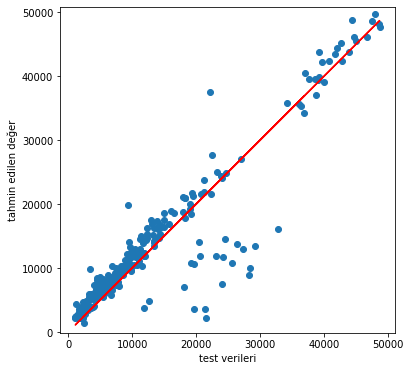

In [62]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat_norm_reel)
plt.plot(y_test,y_test, color="red")
plt.xlabel('test verileri')
plt.ylabel("tahmin edilen değer")
plt.axis('equal')

**RANDOM FOREST**

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 0,)
rf = rf.fit(X_train_norm, y_train_norm)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [64]:
from sklearn.inspection import permutation_importance
rf.feature_importances_


array([0.13113868, 0.1997349 , 0.02053218, 0.00377217, 0.0033794 ,
       0.29326743, 0.3309317 , 0.00558352, 0.00468154, 0.00360019,
       0.00337828])

<BarContainer object of 11 artists>

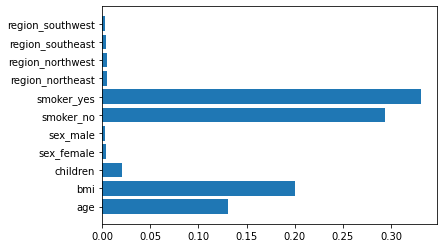

In [65]:
#Random Forest için hiper-parametreler
plt.barh(x_train.columns, rf.feature_importances_)

In [66]:
rf_acc = rf.score(X_test_norm,y_test_norm)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  84.06068180345308


In [67]:
y_pred_rd = rf.predict(X_test_norm)

In [68]:
errors(y_test_norm,y_pred_rd)
r2(y_test_norm,y_pred_rd)

mae: 0.042692306413016336 
mse: 0.005450041312674352 
rmse: 0.07382439510537389


0.8406068180345307

**XGBOOST**

In [69]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train_norm, y_train_norm)

[01:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [70]:
xgbr.feature_importances_

array([0.03683342, 0.0444022 , 0.00595773, 0.00207107, 0.        ,
       0.88453066, 0.        , 0.00586103, 0.00993049, 0.00186004,
       0.00855333], dtype=float32)

<BarContainer object of 11 artists>

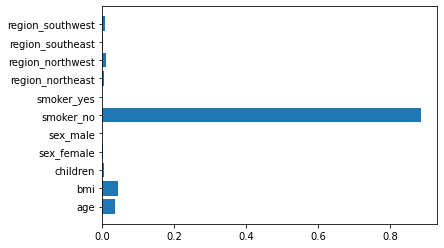

In [71]:
#xgboost için hiperparametreler
plt.barh(x_train.columns, xgbr.feature_importances_)


In [72]:
xgb_acc = xgbr.score(X_test_norm,y_test_norm)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  85.5701311936406


In [73]:
y_pred_xgb = xgbr.predict(X_test_norm)
errors(y_test_norm,y_pred_xgb)
r2(y_test_norm,y_pred_xgb)

mae: 0.040523066530217075 
mse: 0.004933923782773019 
rmse: 0.07024189478347675


0.8557013119364061

**K NEIGHBOURS**

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train_norm,y_train_norm)

KNeighborsRegressor(n_neighbors=1)

In [75]:
knn_acc = knn.score(X_test_norm, y_test_norm)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  65.86364205213796


In [76]:
y_pred_knn = knn.predict(X_test_norm)

In [77]:
errors(y_test_norm,y_pred_knn)
r2(y_test_norm,y_pred_knn)

mae: 0.05693135470987772 
mse: 0.011672052642778161 
rmse: 0.1080372743213108


0.6586364205213796

In [79]:
acc = {'model':['random forest','k - neighbours','xgboost'],'Doğruluk yüzdesi':[rf_acc,knn_acc,xgb_acc]}


In [80]:
acc_df = pd.DataFrame(acc)
acc_df

,model,Doğruluk yüzdesi
0,random forest,84.060682
1,k - neighbours,65.863642
2,xgboost,85.570131


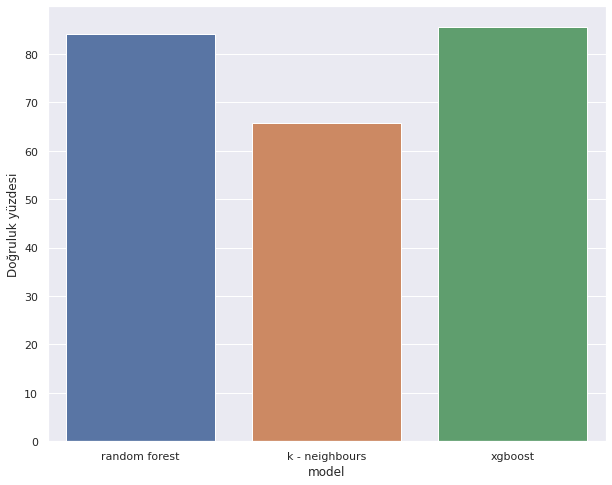

In [81]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='Doğruluk yüzdesi',data=acc_df)
plt.show()